In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision

`!gdown 10X11GsRgxToT9y4OjXJPXr_ilRygykZz`

`!gdown 1vpuIWrZlSqGsvCILWMpYJG35YGFnBnhg`

In [2]:
# Getting the data from the google drive
!gdown 10X11GsRgxToT9y4OjXJPXr_ilRygykZz # Train set is about 68 MB
!gdown 1vpuIWrZlSqGsvCILWMpYJG35YGFnBnhg # Test set is about 8 MB

Downloading...
From: https://drive.google.com/uc?id=10X11GsRgxToT9y4OjXJPXr_ilRygykZz
To: /content/df_train.parquet.gzip
100% 70.9M/70.9M [00:01<00:00, 47.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vpuIWrZlSqGsvCILWMpYJG35YGFnBnhg
To: /content/df_test.parquet.gzip
100% 7.89M/7.89M [00:00<00:00, 21.1MB/s]


In [3]:
df_train_eval = pd.read_parquet('df_train.parquet.gzip')
df_test = pd.read_parquet('df_test.parquet.gzip')
df_train_eval.head()

image  emotion_idx
0  [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....            0
1  [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...            0
2  [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...            2
3  [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....            4
4  [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...            6

In [4]:
df_train, df_eval = train_test_split(df_train_eval, test_size=0.1)


df_train = df_train.reset_index(drop=True)
df_eval = df_eval.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [5]:
df_train.head()

image  emotion_idx
0  [161.0, 167.0, 170.0, 173.0, 179.0, 178.0, 192...            4
1  [242.0, 238.0, 226.0, 199.0, 177.0, 121.0, 106...            3
2  [46.0, 47.0, 34.0, 43.0, 57.0, 79.0, 116.0, 15...            3
3  [240.0, 221.0, 187.0, 149.0, 112.0, 85.0, 64.0...            6
4  [19.0, 20.0, 22.0, 9.0, 4.0, 6.0, 7.0, 11.0, 2...            0

In [6]:
df_eval.head()

image  emotion_idx
0  [82.0, 78.0, 92.0, 90.0, 55.0, 43.0, 52.0, 65....            0
1  [2.0, 24.0, 38.0, 80.0, 100.0, 65.0, 32.0, 52....            0
2  [75.0, 130.0, 174.0, 184.0, 194.0, 200.0, 207....            5
3  [11.0, 12.0, 10.0, 10.0, 11.0, 11.0, 12.0, 13....            4
4  [102.0, 88.0, 64.0, 67.0, 66.0, 88.0, 96.0, 87...            5

In [42]:
df_test.head()

image  emotion_idx
0  [170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ...           -1
1  [7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ...           -1
2  [232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246...           -1
3  [200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111....           -1
4  [40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78....           -1

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Show some pictures Randomly
</font>
</h2>


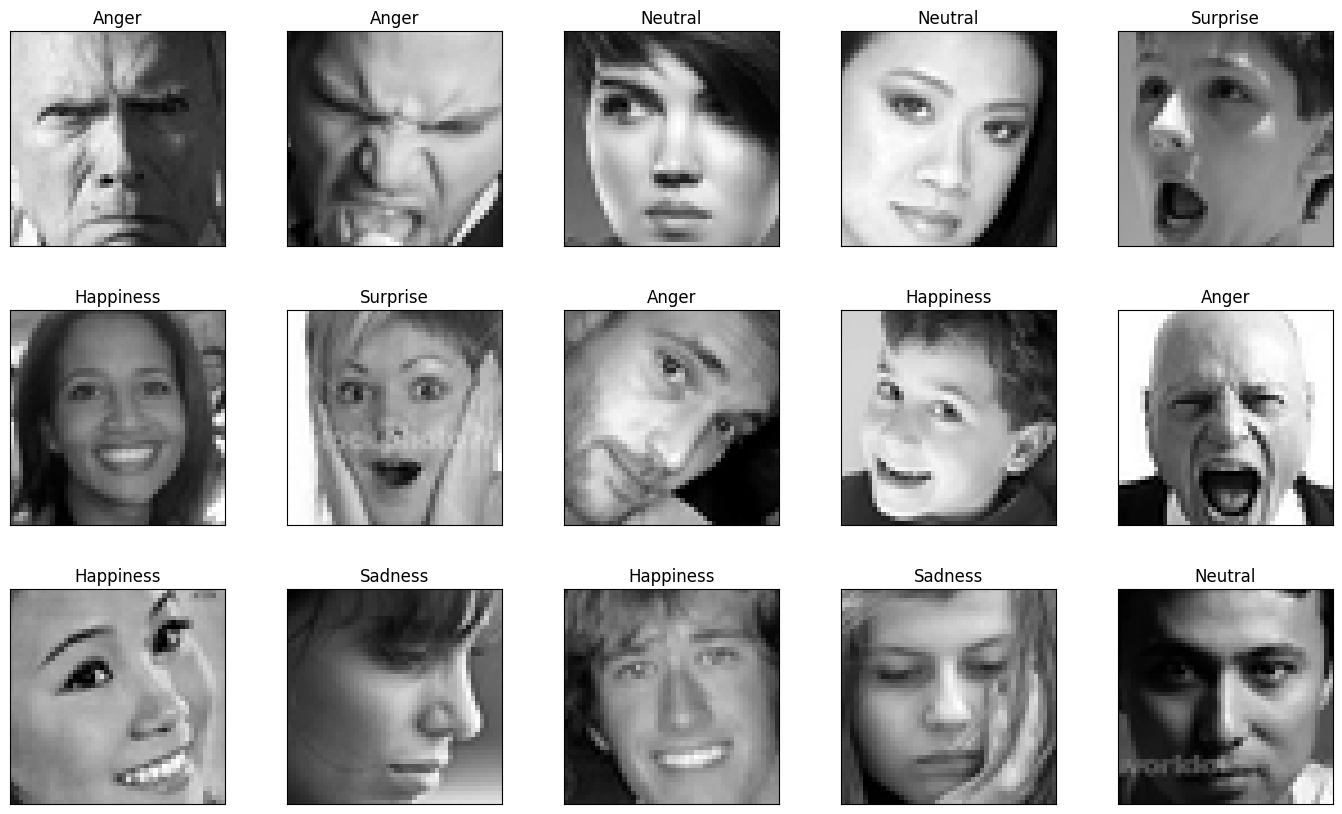

In [8]:
row, col = 3, 5
img_size = 14
fig, axes = plt.subplots(row, col, figsize=(img_size,img_size*row/col))
fig.tight_layout()
fig.subplots_adjust(hspace=.25)
emotions = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

# Print row*col random images
for i in range(row):
    for j in range(col):
        ax = axes[i,j]
        k = np.random.randint(len(df_train.image)) # Pick a random image in the dataset
        img = df_train.image[k].reshape(48,48)
        lbl = emotions[df_train.emotion_idx[k]].capitalize() # Label for the image
        ax.set_title(f'{lbl}')
        ax.imshow(img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])


<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Distribution of Emotions
</font>
</h2>


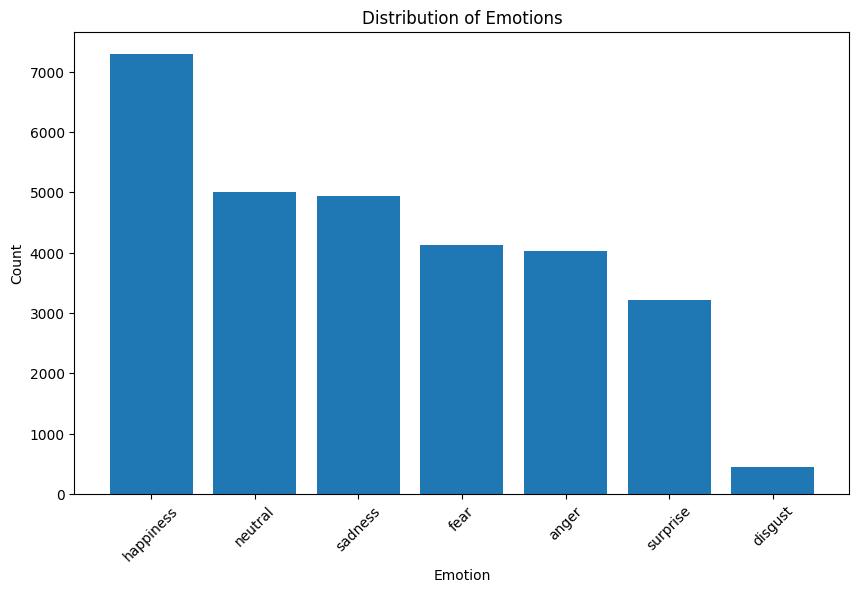

In [10]:
emotion_counts = df_train['emotion_idx'].value_counts()

# Create a dictionary to map emotion_idx to emotion_name
emotion_map = {idx: name for idx, name in enumerate(emotions)}

# Use the map to rename the index of emotion_counts
emotion_counts = emotion_counts.rename(index=emotion_map)

plt.figure(figsize=(10,6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')

# Set the x-axis labels
plt.xticks(rotation=45)
plt.show()

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Normalizing
</font>
</h2>


In [11]:
mean = df_train['image'].mean().mean()
var = (df_train['image'].apply(lambda x: np.sum((x-mean)*(x-mean)))).sum() / (len(df_train)*48*48)
std = var**0.5
print(mean, std)

129.42069053180376 65.02919762351397


<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    <code>Create Dataset in Pytorch</code>  
</font>
</h2>


In [12]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class ImgDataset(Dataset):
    def __init__(self, df, train=False):
        self.df = df
        if train:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),  # Resize the image to 224*224 (resnet18 input size)
                transforms.RandomRotation(degrees=30), # Random rotation (only for trian) # add you own transforms
                transforms.ToTensor(),  # Convert the PIL Image to tensor.
                transforms.Normalize(mean=[mean], std=[std]),  # Normalize the tensor
                transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Convert to 3 channels
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),  # Resize the image to 224*224 (resnet18 input size)
                transforms.ToTensor(),  # Convert the PIL Image to tensor.
                transforms.Normalize(mean=[mean], std=[std]),  # Normalize the tensor
                transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Convert to 3 channels
            ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img = self.df.image[idx].reshape(48,48)
        lbl = self.df.emotion_idx[idx] # Label is index (i.e. argmax of one-hot representation)
        img = Image.fromarray(img) # Convert to PIL Image
        img = self.transform(img)
        sample = (img, lbl) # Sample is the pair (features, target)
        return sample

<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
    <code>Fill emotion_idx column with -1</code>  <code dir=ltr></code> 

</font>
</p>

In [13]:
train_dataset = ImgDataset(df_train, train=True)
eval_dataset = ImgDataset(df_eval)

df_test['emotion_idx'] = -1
test_dataset = ImgDataset(df_test)

<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
 <code>DataLoader</code></font>
</p>

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 128

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
eval_dataloader =  DataLoader(eval_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
test_dataloader =  DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Create Model in Pytorch
</font>
</h2>


<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
<code>torch.nn.Module</code>

<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir"><code>torchvision.models.resnet18(pretrained=True)</code>
</font>
</p>

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Emotional_resnet18(nn.Module):
    def __init__(self):
        super(Emotional_resnet18, self).__init__()
        # Load a pre-trained ResNet18 model
        resnet18 = torchvision.models.resnet18(pretrained=True)

        self.backbone = torch.nn.Sequential(*list(resnet18.children())[:-1])
        self.l1 = nn.Linear(512, 100)
        self.l2 = nn.Linear(100, 7)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.backbone(x).reshape(-1,512)
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.softmax(x)
        return x

<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Training
</font>
</h2>


<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
<code>torch.cuda.is_available()</code>
</font>
</p>

In [19]:
# Select GPU if available

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


In [20]:
import torch.optim as optim
from sklearn.metrics import *
from tqdm import tqdm

net = Emotional_resnet18().to(device)
loss_func = nn.CrossEntropyLoss() # Because of multiclass classification task
optimizer = optim.Adam(net.parameters(), lr=1e-4) 

epochs = 30

def learn_one_step(net, optimizer, data, device, loss_func):
    inputs, labels = data  
    inputs = inputs.to(device) 
    labels = labels.to(device) 

    outputs = net(inputs.float()) 
    loss = loss_func(outputs, labels) 
    loss.backward() 
    optimizer.step() 
    optimizer.zero_grad() 

    return loss.item()

def evaluate_one_step(net, data,  device, loss_func):
    with torch.no_grad():
        inputs, labels = data 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        outputs = net(inputs.float()) 
        loss = loss_func(outputs, labels) 
        outputs_idx = outputs.argmax(axis=1)  
        accuracy = torch.mean((labels==outputs_idx).float()) 

        return accuracy.item(), loss.item()

history_loss=[]

for epoch in range(epochs):
    print(f'Epoch {epoch+1}')
    running_loss = 0

    # Training
    net.train()
    for i, data in enumerate(tqdm(train_dataloader)):

        loss = learn_one_step(net, optimizer, data, device, loss_func)

        # monitoring training loss
        running_loss += loss
        if i % 100 == 99:
            history_loss.append(running_loss/100)
            print('loss: %.3f' % (running_loss / 100))
            running_loss = 0


    # Validation (performed on test set)
    batch_accuracies, batch_losses=[], []
    net.eval()
    for i, data in enumerate(eval_dataloader, 0):
        batch_accuracy, batch_loss = evaluate_one_step(net, data, device, loss_func)

        batch_accuracies.append(batch_accuracy)
        batch_losses.append(batch_loss)

    acc = torch.mean(torch.tensor(batch_accuracies))*100
    loss = torch.mean(torch.tensor(batch_losses))
    print('Validation accuracy: {acc:.2f}%, Validation loss: {loss:.4f}'.format(acc=acc, loss=loss))


Epoch 1


 44%|████▍     | 100/228 [00:53<01:08,  1.88it/s]

loss: 1.743


 88%|████████▊ | 200/228 [01:47<00:14,  1.88it/s]

loss: 1.636


100%|██████████| 228/228 [02:02<00:00,  1.86it/s]


Validation accuracy: 55.41%, Validation loss: 1.6151
Epoch 2


 44%|████▍     | 100/228 [00:53<01:07,  1.88it/s]

loss: 1.595


 88%|████████▊ | 200/228 [01:49<00:15,  1.85it/s]

loss: 1.578


100%|██████████| 228/228 [02:04<00:00,  1.83it/s]


Validation accuracy: 60.06%, Validation loss: 1.5690
Epoch 3


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.535


 88%|████████▊ | 200/228 [01:50<00:15,  1.85it/s]

loss: 1.524


100%|██████████| 228/228 [02:05<00:00,  1.81it/s]


Validation accuracy: 60.75%, Validation loss: 1.5528
Epoch 4


 44%|████▍     | 100/228 [00:54<01:09,  1.85it/s]

loss: 1.495


 88%|████████▊ | 200/228 [01:49<00:15,  1.85it/s]

loss: 1.498


100%|██████████| 228/228 [02:04<00:00,  1.83it/s]


Validation accuracy: 63.69%, Validation loss: 1.5232
Epoch 5


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.476


 88%|████████▊ | 200/228 [01:51<00:15,  1.84it/s]

loss: 1.480


100%|██████████| 228/228 [02:06<00:00,  1.81it/s]


Validation accuracy: 62.78%, Validation loss: 1.5348
Epoch 6


 44%|████▍     | 100/228 [00:55<01:14,  1.72it/s]

loss: 1.469


 88%|████████▊ | 200/228 [01:51<00:15,  1.80it/s]

loss: 1.469


100%|██████████| 228/228 [02:07<00:00,  1.79it/s]


Validation accuracy: 64.81%, Validation loss: 1.5150
Epoch 7


 44%|████▍     | 100/228 [00:56<01:11,  1.79it/s]

loss: 1.455


 88%|████████▊ | 200/228 [01:52<00:16,  1.70it/s]

loss: 1.455


100%|██████████| 228/228 [02:07<00:00,  1.78it/s]


Validation accuracy: 64.59%, Validation loss: 1.5156
Epoch 8


 44%|████▍     | 100/228 [00:55<01:10,  1.83it/s]

loss: 1.444


 88%|████████▊ | 200/228 [01:50<00:17,  1.61it/s]

loss: 1.440


100%|██████████| 228/228 [02:05<00:00,  1.81it/s]


Validation accuracy: 64.12%, Validation loss: 1.5201
Epoch 9


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.425


 88%|████████▊ | 200/228 [01:51<00:16,  1.71it/s]

loss: 1.433


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 65.50%, Validation loss: 1.5071
Epoch 10


 44%|████▍     | 100/228 [00:56<01:10,  1.82it/s]

loss: 1.424


 88%|████████▊ | 200/228 [01:52<00:15,  1.81it/s]

loss: 1.420


100%|██████████| 228/228 [02:07<00:00,  1.78it/s]


Validation accuracy: 65.53%, Validation loss: 1.5033
Epoch 11


 44%|████▍     | 100/228 [00:55<01:09,  1.83it/s]

loss: 1.412


 88%|████████▊ | 200/228 [01:51<00:15,  1.82it/s]

loss: 1.414


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 65.78%, Validation loss: 1.5021
Epoch 12


 44%|████▍     | 100/228 [00:55<01:11,  1.78it/s]

loss: 1.407


 88%|████████▊ | 200/228 [01:51<00:15,  1.78it/s]

loss: 1.406


100%|██████████| 228/228 [02:07<00:00,  1.79it/s]


Validation accuracy: 66.00%, Validation loss: 1.4996
Epoch 13


 44%|████▍     | 100/228 [00:56<01:12,  1.76it/s]

loss: 1.393


 88%|████████▊ | 200/228 [01:53<00:16,  1.74it/s]

loss: 1.402


100%|██████████| 228/228 [02:08<00:00,  1.77it/s]


Validation accuracy: 65.66%, Validation loss: 1.5023
Epoch 14


 44%|████▍     | 100/228 [00:55<01:09,  1.84it/s]

loss: 1.392


 88%|████████▊ | 200/228 [01:51<00:16,  1.70it/s]

loss: 1.393


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.00%, Validation loss: 1.5020
Epoch 15


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.383


 88%|████████▊ | 200/228 [01:50<00:16,  1.70it/s]

loss: 1.386


100%|██████████| 228/228 [02:05<00:00,  1.81it/s]


Validation accuracy: 65.81%, Validation loss: 1.5038
Epoch 16


 44%|████▍     | 100/228 [00:55<01:09,  1.83it/s]

loss: 1.374


 88%|████████▊ | 200/228 [01:51<00:15,  1.78it/s]

loss: 1.372


100%|██████████| 228/228 [02:06<00:00,  1.81it/s]


Validation accuracy: 67.09%, Validation loss: 1.4929
Epoch 17


 44%|████▍     | 100/228 [00:55<01:08,  1.86it/s]

loss: 1.369


 88%|████████▊ | 200/228 [01:50<00:15,  1.83it/s]

loss: 1.372


100%|██████████| 228/228 [02:05<00:00,  1.82it/s]


Validation accuracy: 66.38%, Validation loss: 1.5028
Epoch 18


 44%|████▍     | 100/228 [00:55<01:15,  1.70it/s]

loss: 1.364


 88%|████████▊ | 200/228 [01:51<00:15,  1.76it/s]

loss: 1.371


100%|██████████| 228/228 [02:07<00:00,  1.79it/s]


Validation accuracy: 66.31%, Validation loss: 1.4987
Epoch 19


 44%|████▍     | 100/228 [00:55<01:10,  1.82it/s]

loss: 1.368


 88%|████████▊ | 200/228 [01:51<00:15,  1.81it/s]

loss: 1.362


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.44%, Validation loss: 1.4990
Epoch 20


 44%|████▍     | 100/228 [00:55<01:12,  1.76it/s]

loss: 1.361


 88%|████████▊ | 200/228 [01:51<00:15,  1.83it/s]

loss: 1.362


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.38%, Validation loss: 1.4957
Epoch 21


 44%|████▍     | 100/228 [00:54<01:12,  1.77it/s]

loss: 1.352


 88%|████████▊ | 200/228 [01:51<00:15,  1.79it/s]

loss: 1.352


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 67.47%, Validation loss: 1.4882
Epoch 22


 44%|████▍     | 100/228 [00:56<01:12,  1.77it/s]

loss: 1.352


 88%|████████▊ | 200/228 [01:52<00:15,  1.76it/s]

loss: 1.344


100%|██████████| 228/228 [02:07<00:00,  1.78it/s]


Validation accuracy: 65.06%, Validation loss: 1.5100
Epoch 23


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.344


 88%|████████▊ | 200/228 [01:50<00:15,  1.77it/s]

loss: 1.342


100%|██████████| 228/228 [02:05<00:00,  1.82it/s]


Validation accuracy: 66.72%, Validation loss: 1.4954
Epoch 24


 44%|████▍     | 100/228 [00:56<01:10,  1.80it/s]

loss: 1.348


 88%|████████▊ | 200/228 [01:52<00:15,  1.75it/s]

loss: 1.340


100%|██████████| 228/228 [02:07<00:00,  1.78it/s]


Validation accuracy: 65.91%, Validation loss: 1.5029
Epoch 25


 44%|████▍     | 100/228 [00:56<01:10,  1.83it/s]

loss: 1.329


 88%|████████▊ | 200/228 [01:51<00:15,  1.80it/s]

loss: 1.338


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.47%, Validation loss: 1.4958
Epoch 26


 44%|████▍     | 100/228 [00:55<01:09,  1.85it/s]

loss: 1.332


 88%|████████▊ | 200/228 [01:50<00:15,  1.83it/s]

loss: 1.334


100%|██████████| 228/228 [02:05<00:00,  1.81it/s]


Validation accuracy: 66.62%, Validation loss: 1.4965
Epoch 27


 44%|████▍     | 100/228 [00:55<01:11,  1.78it/s]

loss: 1.333


 88%|████████▊ | 200/228 [01:52<00:15,  1.82it/s]

loss: 1.328


100%|██████████| 228/228 [02:07<00:00,  1.79it/s]


Validation accuracy: 67.31%, Validation loss: 1.4890
Epoch 28


 44%|████▍     | 100/228 [00:55<01:14,  1.72it/s]

loss: 1.326


 88%|████████▊ | 200/228 [01:51<00:15,  1.83it/s]

loss: 1.330


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.97%, Validation loss: 1.4945
Epoch 29


 44%|████▍     | 100/228 [00:55<01:11,  1.80it/s]

loss: 1.330


 88%|████████▊ | 200/228 [01:51<00:15,  1.82it/s]

loss: 1.330


100%|██████████| 228/228 [02:06<00:00,  1.80it/s]


Validation accuracy: 66.06%, Validation loss: 1.5018
Epoch 30


 44%|████▍     | 100/228 [00:55<01:09,  1.83it/s]

loss: 1.327


 88%|████████▊ | 200/228 [01:50<00:15,  1.78it/s]

loss: 1.316


100%|██████████| 228/228 [02:05<00:00,  1.82it/s]


Validation accuracy: 67.06%, Validation loss: 1.4924


<h2 dir=rtl align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Evaluate and generate predictions
</font>
</h2>


<p dir=rtl style="direction: ltr; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
 (confusion matrix) 
<br>
    <code>ConfusionMatrixDisplay</code>
</font>
</p>

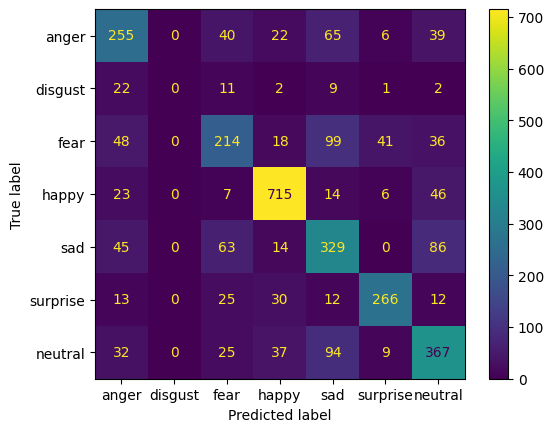

In [32]:
def get_model_predictions(net, data,  device):
    with torch.no_grad():
        inputs, labels = data 
        inputs = inputs.to(device) 
        labels = labels.to(device) 

        outputs = net(inputs.float()) 
        outputs_idx = outputs.argmax(axis=1)  
        return outputs_idx.cpu().tolist()

net.eval()
eval_outputs=[]
eval_labels=[]
for i, data in enumerate(eval_dataloader, 0):
    outputs_idx = get_model_predictions(net, data,  device)

    eval_outputs+=outputs_idx
    eval_labels+=data[1].tolist()

ConfusionMatrixDisplay(confusion_matrix(eval_labels, eval_outputs), display_labels=['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']).plot()

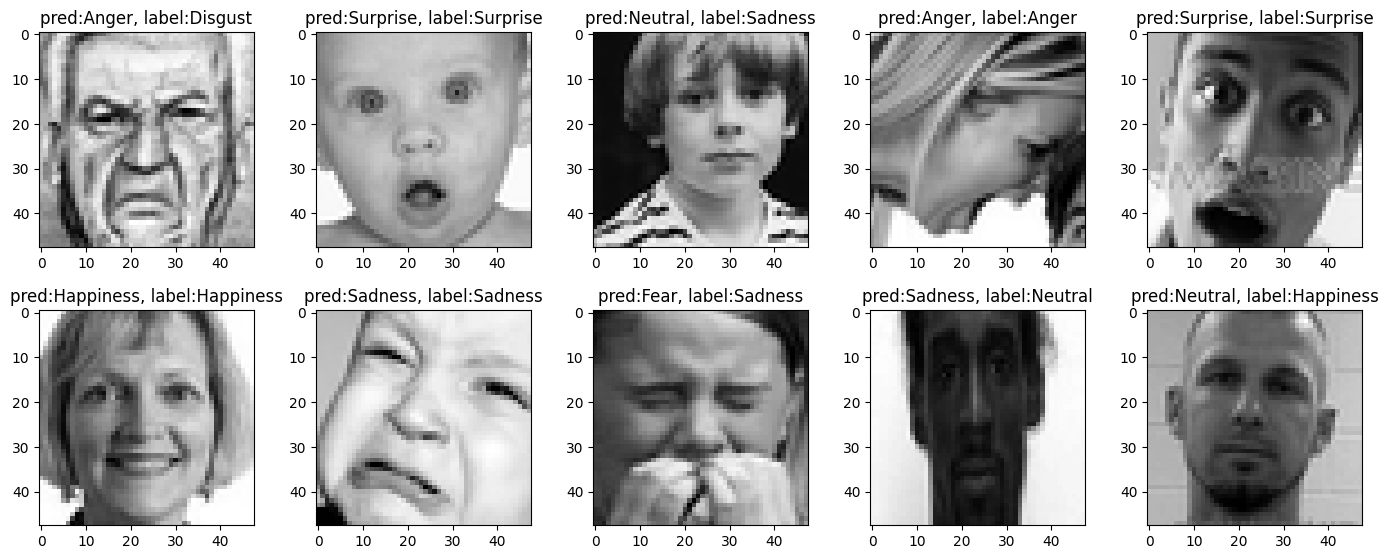

In [34]:
# visualize better what we are working with
import numpy as np
import matplotlib.pyplot as plt

row, col = 2, 5
img_size = 14 # Size of each picture in the plot
fig, axes = plt.subplots(row, col, figsize=(img_size,img_size*row/col))
fig.tight_layout()
fig.subplots_adjust(hspace=.25)

# Print row*col random images
for i in range(row):
    for j in range(col):
        ax = axes[i,j]
        k = np.random.randint(len(df_eval.image)) # Pick a random image in the dataset
        img = df_eval.image[k].reshape(48,48)
        output = emotions[eval_outputs[k]].capitalize()# prediction for the image
        label = emotions[eval_labels[k]].capitalize()# label for the image
        ax.set_title(f'pred:{output}, label:{label}')
        ax.imshow(img, cmap='gray')

In [47]:
net.eval()
test_prediction = []
for i, data in enumerate(test_dataloader, 0):
    outputs_idx = get_model_predictions(net, data,  device)
    test_prediction += outputs_idx